# AB-тестирование
## Задание AB.1


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.

**Баллы за задание:**

* Задача 1 — 10 баллов
* Задача 2 — 10 баллов
* Задача 3 — 30 баллов
* Задача 4 — 40 баллов
* Задача 5 — 60 баллов
* Задача 6 — 60 баллов




**Важность задач:**

* *высокая:* задачи 1, 2, 3, 5, 6;
* *средняя:* задача 4.


----


In [1]:
# Bot check

# HW_ID: ds_ab1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import random
import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm
from statsmodels.stats.proportion import proportion_confint

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='Set2')

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- b3d4a8d1eb3329088705105755e44228 -->
---
### Задача 1

Проверьте, отличается ли средний балл студентов 3 курса DS-потока за задания SP.9 и SP.10 осенью 2024. Не забывайте статистическую значимость и про визуализацию

In [3]:
marks_sp = pd.read_csv('SP_marks.csv')

marks_sp.head(10)

,Имя,9,10
0,MAX,210.00,240.00
1,Алимаскина Екатерина,149.50,150.00
2,Артюх Никита,197.50,206.00
3,Беликов Дмитрий,170.50,170.00
4,Белинский Тимофей,112.00,145.00
5,Виноградов Иван,180.50,125.00
6,Гурьянов Иван,181.75,175.00
7,Дементьев Сергей,189.50,59.50
8,Дмитриевич Александр,154.50,135.00
9,Евсеев Григорий,195.50,219.25


Отнормируем оценки и найдем среднее.

In [4]:
MAX_SP9 = marks_sp.iloc[0]["9"]
MAX_SP10 = marks_sp.iloc[0]["10"]

if 0 in marks_sp.index:
    marks_sp.drop(0, inplace=True)

marks_sp["9"] /= MAX_SP9
marks_sp["10"] /= MAX_SP10

Так как задания выполняли одни и те же студенты, то выборки связные. Посмотрим на их визуальное распределение.

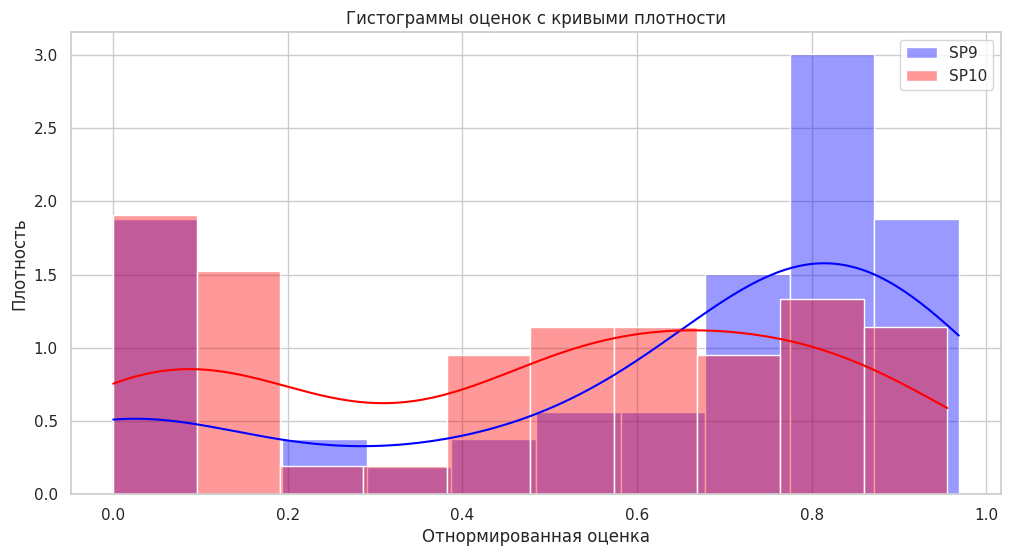

In [5]:
fig = plt.figure(figsize=(12, 6))

sns.histplot(marks_sp["9"], kde=True, label="SP9", color="blue", stat="density", alpha=0.4, bins=10)
sns.histplot(marks_sp["10"], kde=True, label="SP10", color="red", stat="density", alpha=0.4, bins=10)

plt.title("Гистограммы оценок с кривыми плотности")
plt.xlabel("Отнормированная оценка")
plt.ylabel("Плотность")

plt.legend()
plt.show()

Как видим результаты работ действительно коррелируют, поэтому будем использовать t-test для связных выборок.

In [6]:
stat, pval = sps.ttest_rel(marks_sp["9"], marks_sp["10"])

alpha = 0.05
print("Результаты проверки H_0: сдвиги равны")
print(f"p-value критерия: {np.round(pval, 4)}")
print(f"Отвергаем ли гипотезу — {pval < alpha}")

Результаты проверки H_0: сдвиги равны
p-value критерия: 0.0003
Отвергаем ли гипотезу — True


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- ff0cc37c6787849d70478b7517a990e5 -->

Сделайте выводы.

В задаче мы проанализировали связность выборок: из визуального анализа был сделан вывод о связности выборок.

На основе этого факта применили t-test для связных выборок, откуда получили, что средний балл студентов отличается. Это может говорить о том, что задания имеют разную сложность, или проверяют различные области знаний студентов.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 8b4ea08a662239177ff6f88e780d4f0e -->
---
### Задача 2
Рассмотрите таблицу с оценками по какому-либо курсу с несколькими семинарскими группами. Выберите свою группу и еще какую-нибудь. Проверьте гипотезу о том, что средний балл не отличается между семинарскими группами. Не забывайте про визуализацию.

Рассмотрим БРС по ТФКП для групп Б05-202 и Б06-203

In [7]:
marks_tfkp = pd.read_csv('tfkp_marks.csv')
MAX_TFKP_MARK = 40

display(marks_tfkp.head())
marks_tfkp[-6: -1]


,ФИО,группа,оценка
0,Артюх Никита Сергеевич,Б05-202,23
1,Евсеев Григорий Владимирович,Б05-202,33
2,Ермолаев Фёдор Андреевич,Б05-202,35
3,Жарчинский Владислав Николаевич,Б05-202,25
4,Жилов Игорь Владимирович,Б05-202,33


,ФИО,группа,оценка
34,Семенов Вадим Романович,Б06-203,27
35,Соколовский Максимилиан Андреевич,Б06-203,33
36,Ширяев Дмитрий Сергеевич,Б06-203,26
37,Юдина Тамара Павловна,Б06-203,36
38,Ядров Платон Владимирович,Б06-203,25


Для удобства отнормируем оценки

In [8]:
marks_tfkp["оценка"] /= MAX_TFKP_MARK

Разобьем датафрейм на две группы соответственно группе студента.

In [9]:
b05_202_df = marks_tfkp[marks_tfkp["группа"] == "Б05-202"]
b06_203_df = marks_tfkp[marks_tfkp["группа"] == "Б06-203"]

Посмотрим на визуализацию, так как студенты в группах разные, то ожидаем независимую выборку.

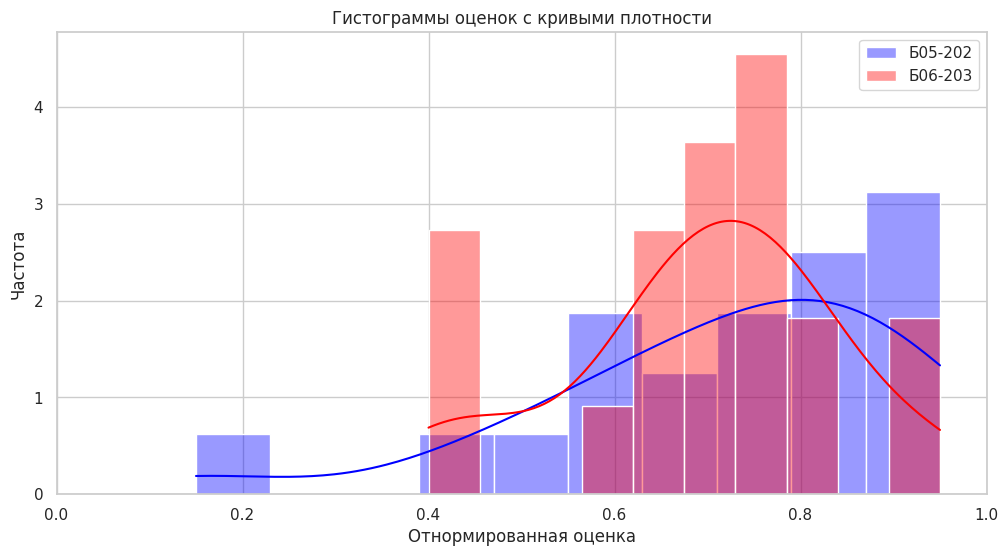

In [10]:
fig = plt.figure(figsize=(12, 6))

sns.histplot(x="оценка", data=b05_202_df, kde=True, label="Б05-202", color="blue", stat="density", alpha=0.4, bins=10)
sns.histplot(x="оценка", data=b06_203_df, kde=True, label="Б06-203", color="red", stat="density", alpha=0.4, bins=10)

plt.title("Гистограммы оценок с кривыми плотности")
plt.xlabel("Отнормированная оценка")
plt.xlim([0, 1])
plt.ylabel("Частота")

plt.legend()
plt.show()

Как видим, группы имеют разное распределение, поэтому будем считать выбокри независимыми.

В таком случае применим t-test для независимых выборок.

In [11]:
stat, pval = sps.ttest_ind(b05_202_df["оценка"], b06_203_df["оценка"], equal_var=False)

alpha = 0.05
print("Результаты проверки H_0: сдвиги равны")
print(f"p-value критерия: {np.round(pval, 4)}")
print(f"Отвергаем ли гипотезу — {pval < alpha}")

Результаты проверки H_0: сдвиги равны
p-value критерия: 0.6677
Отвергаем ли гипотезу — False


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 732d6e08159252b09583684a5e1eab41 -->
Сделайте выводы.

Мы не отвергаем гипотезу о равенстве средних оценок для указанных групп. Это может быть связано с тем, что семинарист у них один и тот же. 

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- a09e6676ed4b3c7a3d9ea521aebef359 -->
---
### Задача 3

Пусть $X=(X_1, ..., X_n)$ и $Y=(Y_1, ..., Y_n)$ — независимые выборки *одинакового* размера. Выведите сходимость статистики *относительного* t-test'а с помощью дельта-метода.

Пусть $X_1,..., X_n \sim N(a_1, \sigma_1^2), \ Y_1, ..., Y_n \sim N(a_2, \sigma_2^2)$

Выведем сходимость статистики относительного t-test-a $R = \frac{\overline{X} - \overline{Y}}{\overline{Y}}$

Рассмотрим $z_i = \left(\begin{array}{c} x_i \\ y_i \end{array}\right)$ 

Тогда $\overline{z} = \left(\begin{array}{c} \overline{x} \\ \overline{y}  \end{array}\right)$ -- а.н.о. $a = \left(\begin{array}{c} a_1 \\ a_2 \end{array}\right)$ c а.д. $\left(\begin{array}{c c} \sigma_1^2 & 0 \\ 0 & \sigma_2^2 \end{array}\right)$

Рассмотрим $\tau(x, y) = \frac{x}{y} - 1$. Для данной функции $\frac{\partial \tau}{\partial x} = \frac{1}{y}$, $\frac{\partial \tau}{\partial y} = - \frac{x}{y^2}$

Применим дельта-метод с указанной функцией и получим, что $\tau(\overline{z}) = \frac{\overline{X} - \overline{Y}}{\overline{Y}} = R$ является а.н.о. $a_R = \tau(a) = \boxed{\frac{a_1 - a_2}{a_2}}$ с а.д. $\sigma_R^2 = \left(\begin{array}{c} \frac{1}{a_2} \\ -\frac{a_1}{a^2_2} \end{array}\right)^T \cdot \left(\begin{array}{c c} \sigma_1^2 & 0 \\ 0 & \sigma_2^2 \end{array}\right) \cdot \left(\begin{array}{c} \frac{1}{a_2} \\ -\frac{a_1}{a^2_2} \end{array}\right) = \boxed{\frac{\sigma_1^2}{a^2_2} + \frac{a_1^2}{a_2^4}\sigma_2^2}$

Получили требуемое (Чтобы получить вместо мат. ожидания и дисперсии их несмещенные оценки достаточно применить теорему Слуцкого).


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3ee9dd1ccd0ec0fbc179dc6ce39cc792 -->
---
### Задача 4

Пусть $X=(X_1, ..., X_n)$ и $Y=(Y_1, ..., Y_m)$ — нормальные выборки с одинаковой неизвестной дисперсией, возможно, *разного* размера. Докажите что статистика *абсолютного* t-test'а имеет распределение Стьюдента с $n+m-2$ степенями свободы.

*Указание.* Воспользуйтесь теоремой об ортогональном разложении гауссовского вектора.

Пусть $X_1 \sim N(a_1, \sigma^2), \ Y_1 \sim N(a_2, \sigma^2)$


В силу независимости:
$$
\frac{\overline{X} - \overline{Y}}{\sigma \sqrt{\frac{1}{n} + \frac{1}{m}}} \sim^{H_0} N(0, 1)
$$

На лекции 3 по математической статистике мы доказали (для этого достаточно рассмотреть $Lin \left(\begin{array}{c}1 \\ . \\ . \\ . \\ 1 \end{array}\right)$ и ортогональное дополнение к этому подпространству, а дальше применить теорему об отрогональном разложении гауссовского вектора), что $\frac{(n - 1)S_X^2}{\sigma^2} \sim \chi^2_{n-1}$. Аналогично: $\frac{(m - 1)S_Y^2}{\sigma^2} \sim \chi_{m-1}^2$

Обозначая $S_{tot}^2 = \frac{(n - 1)S_X^2 + (m-1)S_Y^2}{n+m-2}$, имеем $\frac{S^2_{tot} \cdot (n + m  - 2)}{\sigma^2} \sim \chi^2_{n+m-2}$

Откуда, по определению распределению Стьюдента имеем:
$$
\boxed{
\frac{\overline{X} - \overline{Y}}{S_{tot}\sqrt{\frac{1}{n} + \frac{1}{m}}} \sim^{H_0} T_{n+m-2}
}
$$

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- b46c1240cf4742b0568baaeb94cdc0eb -->
---
### Задача 5

Рассмотрим данные по транзакциям одного из интернет-магазинов: https://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo

Скачайте данные и оставьте колонки:
* `Quantity` &mdash; количество данной единицы товара в чеке.
* `InvoiceDate` &mdash; дата и время покупки.
* `UnitPrice` &mdash; цена одной единицы товара.
* `CustomerID` &mdash; уникальный идентификатор клиента.

In [12]:
online_retail = pd.read_csv("online_retail.csv")
online_retail.dropna(inplace=True)

online_retail = online_retail[["Quantity", "InvoiceDate", "UnitPrice", "CustomerID"]]
online_retail.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,12/01/2010 8:26,2.55,17850.0
1,6,12/01/2010 8:26,3.39,17850.0
2,8,12/01/2010 8:26,2.75,17850.0
3,6,12/01/2010 8:26,3.39,17850.0
4,6,12/01/2010 8:26,3.39,17850.0


In [13]:
online_retail["InvoiceDate"] = pd.to_datetime(online_retail["InvoiceDate"])
online_retail["CustomerID"] = online_retail["CustomerID"].apply(int)
online_retail.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2010-12-01 08:26:00,2.55,17850
1,6,2010-12-01 08:26:00,3.39,17850
2,8,2010-12-01 08:26:00,2.75,17850
3,6,2010-12-01 08:26:00,3.39,17850
4,6,2010-12-01 08:26:00,3.39,17850


Магазин хочет провести AB-тест в течение двух месяцев для оценки значимости эффекта от нового блока умных рекомендаций и использовать для этого *относительный* t-test. Ожидается, что новый блок рекомендаций увеличит общую выручку. На время тестирования решено выкатить блок рекомендаций на случайную группу из 300 пользователей.

**1.**
На искусственных данных мы уже проверили наш тест на занятии, теперь пора проверить на реальных. На данных за апрель и май проведите множество случайных AA-тестов для оценки вероятности ошибки I рода, выбирая случайных пользователей в каждую из групп. Использовать нужно группы одинакого размера, и, конечно же, они не должны пересекаться. Для каждого пользователя рассматриваем общую сумму его покупок за два месяца.

In [14]:
may_april_df = online_retail[(online_retail["InvoiceDate"] >= "2011-04-01") & (online_retail["InvoiceDate"] < "2011-06-01")]

may_april_df["total_price"] = may_april_df["Quantity"] * may_april_df["UnitPrice"]
may_april_df = may_april_df.groupby("CustomerID")["total_price"].sum().reset_index()

may_april_df.head()

,CustomerID,total_price
0,12347,636.25
1,12348,367.00
2,12353,89.00
3,12354,1079.40
4,12355,459.40


Для AA-теста воспользуемся кодом с семинара.

In [15]:
def relative_ttest(x, y, alpha=0.05):
    '''
    Относительный t-test.
    
    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости
    
    Возвращает:
    stat -- статистика критерия
    pvalue
    left_bound, right_bound -- границы дов. интервала
    '''
    
    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    stat = x_mean/y_mean - 1
    var = x.var() / (y_mean**2) \
            + y.var() * (x_mean**2) / (y_mean**4)
    std = np.sqrt(var)
    
    z_stat = np.sqrt(n) * stat / std
    pvalue = 2*sps.norm.sf(np.abs(z_stat))
    
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std/np.sqrt(n)
    right_bound = stat + q*std/np.sqrt(n)
    
    return stat, pvalue, left_bound, right_bound

In [10]:
def AA_test(
    test, generate_sample, data=None, n_iter=10000, alpha=0.05, show_pvals=False
):
    """
    Проведение серии AA-тестов:
        * либо на исторических данных data
        * либо на искусственных данных

    Аргументы:
    test -- статистический критерий
    generate_sample -- функция для семплирования/генерации выборок
    data -- исторические данные, на которых запускаем АА-тест.
        None, если используем искусственные данные
    n_iter -- количество итераций
    alpha -- теоретический уровень значимости
    show_pvals -- показывать ли распределение p-value

    Возвращает:
    type_1_prob_est -- оценка вероятности ошибки первого рода
    left_bound, right_bound -- границы доверительного интервала
    """

    n_rejects = 0  # количество отвержений H_0
    pvals = []

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        # Генерируем выборки
        x, y = generate_sample() if data is None else generate_sample(data)
        # Применияем критерий
        pvals.append(test(x, y)[1])
        n_rejects += pvals[-1] < alpha

    # Оценка вероятности ошибки первого рода
    type_1_prob_est, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)

    # Визуализация
    figsize = (14, 3) if show_pvals else (5, 2)
    visualization(
        type_1_prob_est, left_bound, right_bound, show_pvals, pvals, alpha, figsize
    )
    return type_1_prob_est, (left_bound, right_bound)


def visualization(
    prob_reject,
    left_bound,
    right_bound,
    show_pvals=False,
    pvals=None,
    alpha=0.05,
    figsize=(7, 2),
):
    """
    Отрисовка интервала для вероятности отвержения критерия
    и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теоретический уровень значимости
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    """

    # построение гистограммы p-value (опционально)
    if show_pvals:
        with sns.axes_style("darkgrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(
                pvals,
                bins=np.linspace(0, 1, 21),
                color="blue",
                alpha=0.4,
                weights=np.ones(len(pvals)) / len(pvals),
            )
            plt.title("Распределение p-value")

    # отрисовка интервала для вероятности отвержения критерия
    with sns.axes_style("whitegrid"):
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color="black", lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color="red", lw=5, linestyle="--", alpha=0.6)
        plt.fill_between(
            [left_bound, right_bound], [0.15] * 2, [-0.15] * 2, color="green", alpha=0.6
        )
        plt.scatter(prob_reject, 0, s=300, marker="*", color="red")
        plt.xlim((min(alpha, left_bound) - 1e-3, max(alpha, right_bound) + 1e-3))
        plt.title(
            f"Доля отвержений = {100*prob_reject:.2f}%, "
            f"интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)"
        )
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()


def estimate_reject_prob(n_rejects, n_iter):
    """
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности

    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    """

    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method="wilson")

    return prob_reject, left_bound, right_bound

In [17]:
def generate_sample_AA_test(data):
    data = data.sample(frac=1).reset_index(drop=True)
    
    first_group = data.iloc[:300]
    second_group = data.iloc[300:600]

    return first_group["total_price"], second_group["total_price"]

In [11]:
n_iter = 20000
alpha = 0.05

  0%|          | 0/20000 [00:00<?, ?it/s]

100%|██████████| 20000/20000 [00:30<00:00, 646.35it/s]


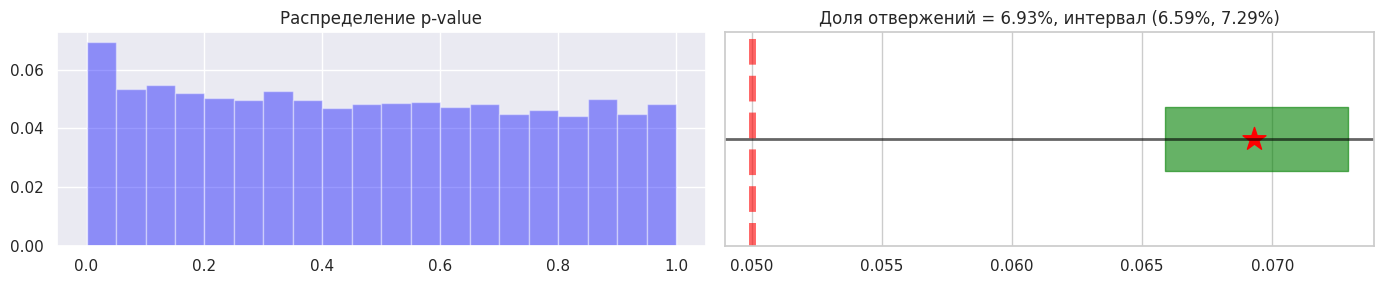

(np.float64(0.0693), (0.06586238489019755, 0.07290303496853098))

In [19]:
AA_test(
    test=relative_ttest,
    generate_sample=generate_sample_AA_test,
    data=may_april_df,
    n_iter=n_iter,
    alpha=alpha,
    show_pvals=True
)

Корректно ли применять критерий на данных магазина? Постройте также гистограмму значений p-value.

Так как левая граница находится правее alpha, то относительный t-test применять в данном случае некорректно.


Гистограмма построена выше, проанализируему ее. 
Как видим, гистограмму не похожа на гистограмму равномерного распределения, значит либо, не справедлива основная гипотеза, либо распределение статистики не одинаково.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 5556fb0f609c015dfc23b008da0ed82f -->
**2.** С помощью проведения AB-теста по историческим данным оцените мощность теста для разных значений эффекта. Схема проведения аналогична предыдущему пункту, но к тестовой группе нужно добавить положительное смещение.

При добавлении искусственного смещения рекомендуется также добавлять небольшой шум для каждого пользователя. Поясните, для чего это может быть полезно.

Чтобы уменьшить влияние корреляций между данными имеет смысл добавить шум.

In [20]:
MEAN_PRICE = may_april_df["total_price"].mean()
MEAN_PRICE

np.float64(680.3666440785306)

Проведем тест, и посмотрим, заметен ли эффект.

In [21]:
def run_experiments(test, generate_sample, add_effect, data=None, effects=[0],
            n_iter=10000, alpha=0.05):    
    '''
    Проведение серии AB-тестов:
        * либо на исторических данных data
        * либо на искусственных данных
   
    Аргументы:
    test -- статистический критерий
    generate_sample -- функция для семплирования/генерации выборок
    add_effect -- функция для искусственного добавления эффекта в тестовую выборку
    data -- исторические данные, на которых запускаем АА-тест. 
        None, если используем искусственные данные
    effect_arr -- массив искусственно добавляемых эффектов
    n_iter -- количество итераций
    alpha -- теоретический уровень значимости

    Возвращает:
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    '''

    n_rejects = np.zeros(len(effects))  # количество отвержений H_0

    # Проведение экспериментов
    for num_effect, effect in tqdm(enumerate(effects)):
        for _ in range(n_iter):
            # Генерируем выборки
            x, y = generate_sample() if data is None else generate_sample(data)
            # Добавляем эффект
            x = add_effect(x, effect)    
            # Применияем критерий
            n_rejects[num_effect] += (test(x, y)[1] < alpha)

    # Реальная мощность
    real_power, left_power, right_power = estimate_reject_prob(n_rejects, n_iter)
    # Отрисовка мощности
    draw_power(effects, real_power, left_power, right_power)
    return real_power, (left_power, right_power)


def add_effect(x, effect):
    '''
    Функция искусственного добавления эффекта в тестовую выборку

    Аргументы:
    x -- выборка
    effect -- добавляемый эффект
    
    Возвращает:
    x -- выборка с добавленным эффектом
    '''
    
    x += effect + np.random.uniform(-effect / 5, effect/5)
    return x


def draw_power(effects, real_power, left_power, right_power, title='График мощности'):
    '''
    Построение и отрисовка графика мощности критерия.
   
    Аргументы:
    effects -- сетка эффектов
    real_alpha -- оценка реальной мощности
    left_alpha, right_alpha -- границы соотв. дов. интервала
    title -- заголовок графика
    '''

    plt.figure(figsize=(10, 4))
    plt.plot(effects, real_power, color='blue', label='Мощность')
    plt.fill_between(effects, left_power, right_power, alpha=0.3, color='blue', 
                     label='Дов. интервал мощности')
    plt.hlines(0.8, effects[0], effects[-1], color='black',
               label='Мощность 0.8 (пересечение - MDE)')
    plt.legend()
    plt.xlabel('Размер эффекта')
    plt.ylabel('Мощность')
    plt.title(title)
    plt.show()

5it [00:42,  8.58s/it]


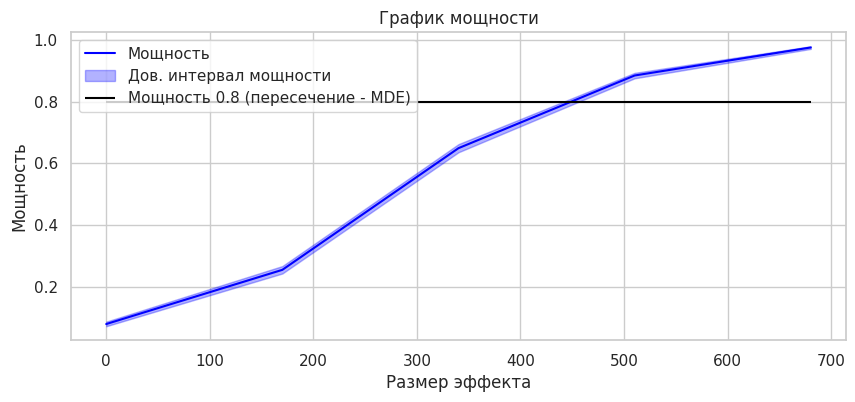

In [ ]:
run_experiments(test=relative_ttest, 
        generate_sample=generate_sample_AA_test,
        data=may_april_df,
        effects=np.linspace(0, MEAN_PRICE, 5),
        add_effect=add_effect,
        n_iter=5000,
        alpha=alpha,
);

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 90f00c77b37ae86263799b64f6fccb74 -->
Сделайте выводы.

На исторических данных нами был опробован метод относительного t-test-a.

* Мы проверили, применимость t-test-a  к данным, и оказалось, что мы не можем отвергнуть основную гипотезу, об изменении среднего чека, что верно, ведь в действительности ничего не изменилось.

* Проверили при каком размере эффекта наш критерий обладает достаточной мощностью. Оказалось, что это происходит только при значении равном 2/3 от среднего общего чека, что достаточно весомо.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4e95cc9146338b26732f892ba3d091bd -->
---
### Задача 6.

Рассмотрим t-test в абсолютной и относительной постановке. При использовании данных критериев предполагается, что статистика критерия (не сама выборка) приближенно имеет нормальное распределение. Но на практике ее распределение может значительно отличаться от нормального. В таком случае на помощь может прийти бутстреп. 

Опишите процедуру реализации с помощью бутстрепа критериев на основе статистик из t-test в абсолютной и относительной постановке. Необходимо посчитать статистику критерия, доверительный интервал и p-value. 

*Примечание.* Бутстрепом необходимо получить выборку статистик критерия, и затем посчитать необходимые характеристики, а не запускать много раз стандартный t-test.

**Описание:** 

Пусть имеем выборки $X = X_1,..., X_n$ и $Y = Y_1, ..., Y_m$ 

* Генерируем B бутстрепных выборок

* На каждом полученной бутстрепной выборке X и Y считаем статистику.

* На основе полученных реализаций статистик считаем желаемый квантильный ДИ (например в можно взять квантили $(t_{\alpha / 2}, t_{1 - \alpha / 2})$)

* p-value реализации статистики t, считаем как долю статистик, которые оказались более экстремальными чем t.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- efb009736981955ae3ebae7fbefdb42d -->
Сколько бутстрепных выборок необходимо взять?

**Ответ:** Т.к. метод подстановки имеет точность $O(\frac{1}{\sqrt{m + n}})$, а метод Монте-Карло имеет точность $O(\frac{1}{\sqrt{B}})$, то для не ухудшения точности необходимо, чтобы $B \geq m + n$

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 45a00cfc8caab19f1f2860993ee2450e -->
Какие основные преимущества и недостатки использования бутстрепных критериев?

**Ответ:** Основное преимущество -- быстрый подсчет желаемой характеристики статистики, без необходимости честно использовать метод подстановки и дельта-метод.

Недостатки: Необходимо подсчитать множество реализаций статистики и соответственно сэмплирования, а также при небольшом бутстрепе может значительно снизится точность.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 88f53128fa57481639acbacc9518da3a -->
Реализуйте эту процедуру.

In [ ]:
def bootstrap_sample(x):
    return np.random.choice(x, size=len(x), replace=True)


def get_bootstrap_stats(x, y, ttest, n_iter=10000, alpha=0.05):
    """
    Выполняет бутстреп-тест на основе заданной функции ttest, используя бутстреп-выборки.

    Параметры:
      x, y: исходные выборки
      ttest: функция для расчёта t-теста, должна принимать два аргумента (выборки)
      n_iter: число итераций бутстрепа
      alpha: уровень значимости

    Возвращает:
      Вероятность ошибки первого рода, словарь с p-value и статистиками бутстрепа, а также оригинальное значение статистики и p-value.
    """
    n_iter = max(len(x) + len(y), n_iter)

    bootstrap_info = {"pvals": [], "stats": []}
    for _ in tqdm(range(n_iter)):
        new_x = bootstrap_sample(x)
        new_y = bootstrap_sample(y)

        stat, pval = ttest(new_x, new_y)

        bootstrap_info["pvals"].append(pval)
        bootstrap_info["stats"].append(stat)

    original_stat, original_pval = ttest(x, y)

    return bootstrap_info, original_stat, original_pval


def get_bootstrap_CI(bootstrap_info, ci_type="two-sided", alpha=0.05):
    """
    Вычисляет доверительный интервал (CI) для статистики бутстрепа.

    Параметры:
      bootstrap_info: словарь, содержащий массивы статистик
      ci_type: тип доверительного интервала ('left', 'right' или 'two-sided')
      alpha: уровень значимости

    Возвращает:
      Кортеж (нижняя граница, верхняя граница)
    """

    stats = np.array(bootstrap_info["stats"])
    left_boundry = 0
    right_boundry = 0
    if ci_type == "left":
        left_boundry = np.quantile(stats, alpha)
        right_boundry = np.quantile(stats, 1)
        return (left_boundry, right_boundry)
    elif ci_type == "right":
        left_boundry = np.quantile(stats, 0)
        right_boundry = np.quantile(stats, 1 - alpha)
    else:
        left_boundry = np.quantile(stats, alpha / 2)
        right_boundry = np.quantile(stats, 1 - alpha / 2)

    return (left_boundry, right_boundry)


def get_bootstrap_pval(bootstrap_info, implemented_stat, pval_type="two-sided"):
    """
    Вычисляет бутстреповый p-value на основе распределения статистик.

    Параметры:
      bootstrap_info: словарь с массивом статистик бутстрепа
      implemented_stat: реализованная (наблюдаемая) статистика
      tail_type: тип теста ('left', 'right' или 'two-sided')

    Возвращает:
      p-value
    """

    stats = np.array(bootstrap_info["stats"])

    if type == "left":
        pval_type = np.mean(implemented_stat > stats)
    elif type == "right":
        pval_type = np.mean(implemented_stat < stats)
    else:
        pval_type = 2 * min(
            np.mean(implemented_stat < stats), np.mean(implemented_stat > stats)
        )

    return pval_type


def bootstrap_ttest(
    x,
    y,
    bootstrap_info,
    ttest=sps.ttest_ind,
    alpha=0.05,
    ci_type="two-sided",
    pval_type="two-sided",
):
    original_stat, original_pval = ttest(x, y)
    ci = get_bootstrap_CI(bootstrap_info, ci_type, alpha)
    pval = get_bootstrap_pval(bootstrap_info, original_stat, pval_type)

    return original_stat, pval, ci


def print_bootstrap_results(original_stat, original_pval, ci):
    """
    Выводит результаты бутстрепного t-теста в простом текстовом формате.
    """
    print("Результаты бутстрепного t-теста:")
    print(f"Оригинальная t-статистика: {original_stat:.4f}")
    print(f"Оригинальный p-value: {original_pval:.4f}")
    print(f"Доверительный интервал (двусторонний): ({ci[0]:.4f}, {ci[1]:.4f})")

In [3]:
def vizualize_distributions(distr1, distr2):
    '''
    Функция для отрисовки распределений, из которых генерируются 
    искусственные данные
    
    Аргументы:
    distr1, distr2 -- распределения
    '''
    
    plt.figure(figsize=(5, 3))
    for i, d, label in zip([0, 1], [distr1, distr2], ['A', 'B']):
        grid = np.linspace(d.ppf(0.005) - 0.2, d.ppf(0.995) + 0.2, 1000)
        plt.plot(grid, d.pdf(grid), label=label, lw=4 - 2 * i)
    plt.legend()
    plt.title('Плотности выборок')

def generate_data_from_distrs(distr1, distr2, sample_size=1000):
    '''
    Генерация искусственных данных из распределений
    
    Аргументы:
    distr1, distr2 -- распределения данных теста и контроля
    sample_size -- размер выборок

    Возвращает:
    x, y -- выборки
    '''
    x = distr1.rvs(size=sample_size)
    y = distr2.rvs(size=sample_size)
    return x, y

Абсолютный t-test уже реализован в библиотеке `statsmodels` -- `sps.ttest_ind`.

Реализацию относительного ttest-a возьмем с семинара.

In [4]:
def relative_ttest(x, y, alpha=0.05):
    '''
    Относительный t-test.
    
    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости
    
    Возвращает:
    stat -- статистика критерия
    pvalue
    left_bound, right_bound -- границы дов. интервала
    '''
    
    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    stat = x_mean/y_mean - 1
    var = x.var() / (y_mean**2) \
            + y.var() * (x_mean**2) / (y_mean**4)
    std = np.sqrt(var)
    
    z_stat = np.sqrt(n) * stat / std
    pvalue = 2*sps.norm.sf(np.abs(z_stat))
    
    return stat, pvalue

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 5c08e643e274d6398d17c296ab213693 -->
Проведите исследование реализованных критериев  
* аналогично исследованию относительного t-test'а с занятия, 
* для данных из предыдущей задачи. 

В каждом случае постройте также график бутстрепной оценки распределения статистики и сравните его с нормальным распределением.

Начнем с первого случая. Возьемем $\Gamma$-распредление

  0%|          | 0/30000 [00:00<?, ?it/s]

100%|██████████| 30000/30000 [00:14<00:00, 2067.44it/s]


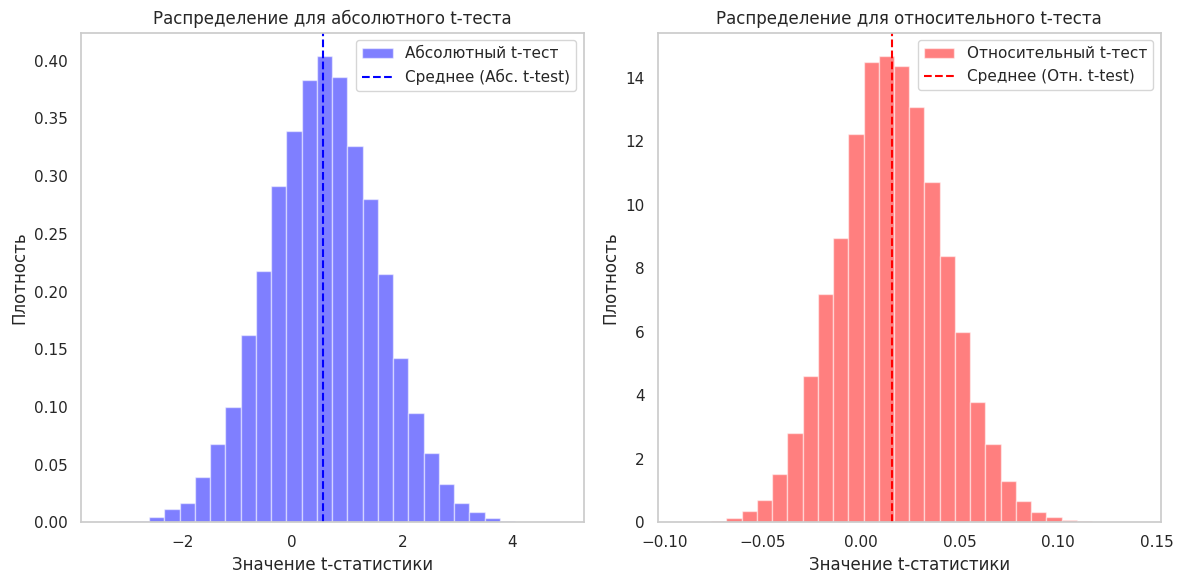

In [6]:
x = sps.gamma(a=3).rvs(size=1000)
y = sps.gamma(a=3).rvs(size=1000)

bootstrap_info_abs, original_stat_abs, original_pval_abs = get_bootstrap_stats(x, y, sps.ttest_ind, n_iter=30000)
bootstrap_info_rel, original_stat_rel, original_pval_rel = get_bootstrap_stats(x, y, relative_ttest, n_iter=30000)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(bootstrap_info_abs["stats"], bins=30, density=True, alpha=0.5, color="blue", label="Абсолютный t-тест")
plt.axvline(np.mean(bootstrap_info_abs["stats"]), color="blue", linestyle="--", label="Среднее (Абс. t-test)")
plt.title("Распределение для абсолютного t-теста")
plt.xlabel("Значение t-статистики")
plt.ylabel("Плотность")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(bootstrap_info_rel["stats"], bins=30, density=True, alpha=0.5, color="red", label="Относительный t-тест")
plt.axvline(np.mean(bootstrap_info_rel["stats"]), color="red", linestyle="--", label="Среднее (Отн. t-test)")
plt.title("Распределение для относительного t-теста")
plt.xlabel("Значение t-статистики")
plt.ylabel("Плотность")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Как видим, бутстрепные статистики имеют нормальное распределение.

Размер выборки 10 и 1000, абсолютный t-test

100%|██████████| 10000/10000 [01:46<00:00, 94.06it/s]


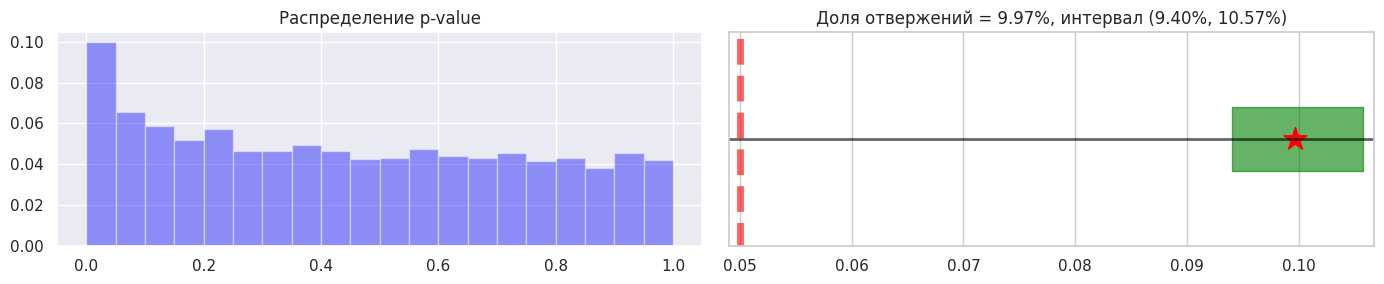

100%|██████████| 10000/10000 [01:53<00:00, 88.27it/s]


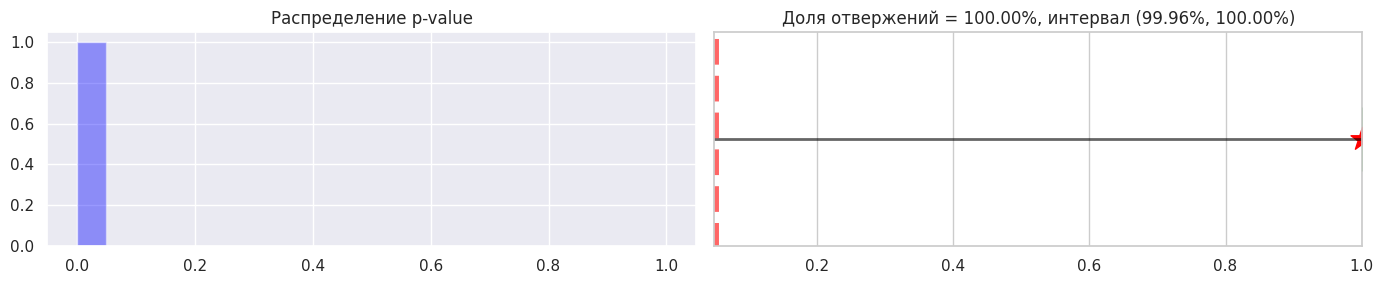

In [12]:
n_iter = 10000

print("Нет эффекта")
# размер выборки 10
AA_test(test=lambda x, y: bootstrap_ttest(x, y, bootstrap_info_abs, sps.ttest_ind),
        generate_sample=lambda: generate_data_from_distrs(sps.gamma(a=3), sps.gamma(a=3), 
                                                          sample_size=10),
        n_iter=n_iter,
        alpha=alpha,
        show_pvals=True,
);

print("Эффект есть")
# размер выборки 1000
AA_test(test=lambda x, y: bootstrap_ttest(x, y, bootstrap_info_abs, sps.ttest_ind),
        generate_sample=lambda: generate_data_from_distrs(sps.gamma(a=3), sps.gamma(a=3, loc=1), 
                                                          sample_size=1000),
        n_iter=n_iter,
        alpha=alpha,
        show_pvals=True,
);

Размер выборки 10 и 1000, относительный t-test

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:22<00:00, 121.25it/s]


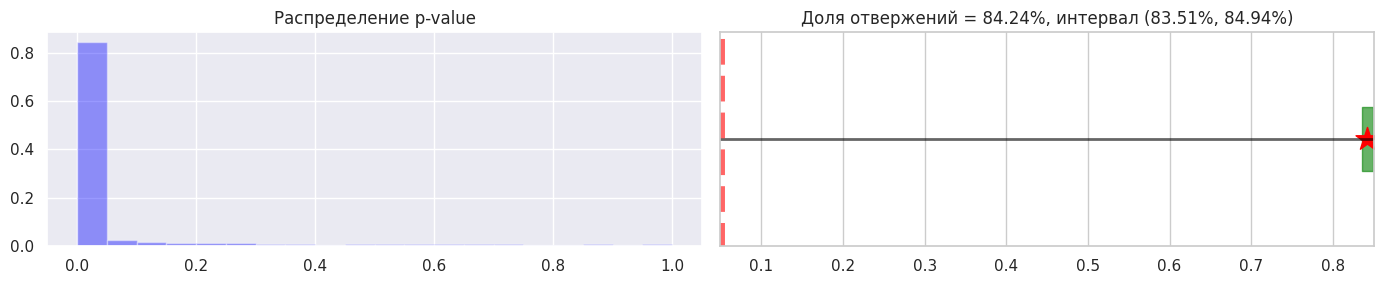

100%|██████████| 10000/10000 [01:23<00:00, 119.10it/s]


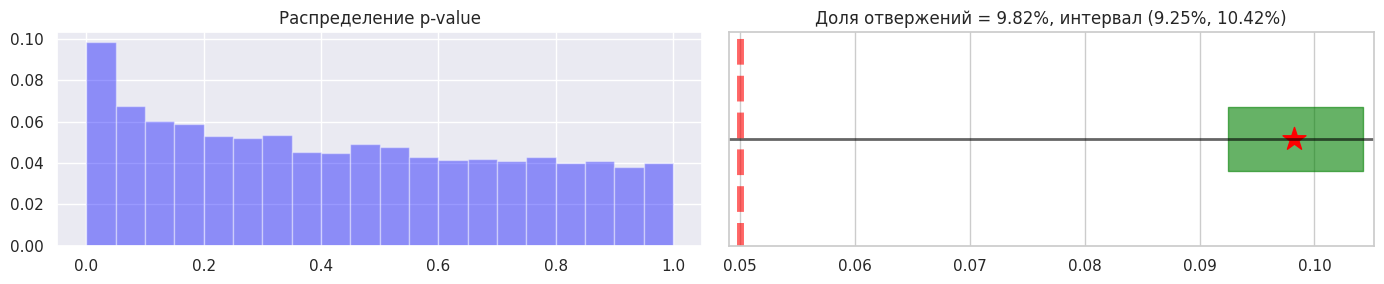

In [31]:
n_iter = 10000

# размер выборки 10
AA_test(test=lambda x, y: bootstrap_ttest(x, y, bootstrap_info_rel, relative_ttest),
        generate_sample=lambda: generate_data_from_distrs(sps.gamma(a=3), sps.gamma(a=3), 
                                                          sample_size=10),
        n_iter=n_iter,
        alpha=alpha,
        show_pvals=True,
);

# размер выборки 1000
AA_test(test=lambda x, y: bootstrap_ttest(x, y, bootstrap_info_rel, relative_ttest),
        generate_sample=lambda: generate_data_from_distrs(sps.gamma(a=3), sps.gamma(a=3), 
                                                          sample_size=1000),
        n_iter=n_iter,
        alpha=alpha,
        show_pvals=True,
);

Теперь исследуем мощность. Для начала для абсолютного теста

11it [01:56, 10.63s/it]


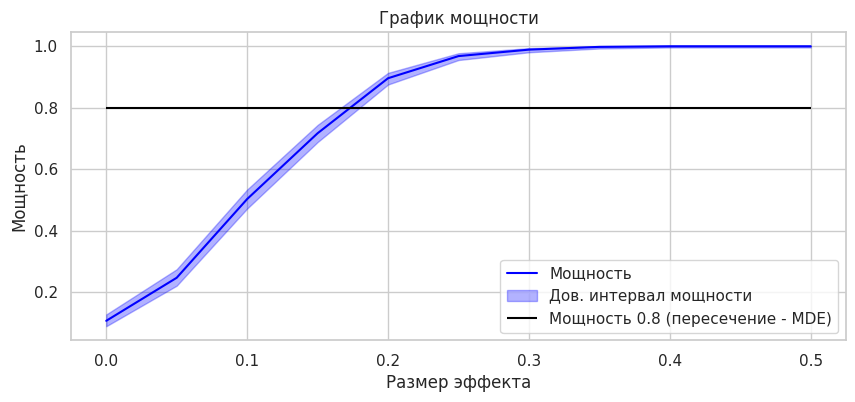

In [32]:
run_experiments(test=lambda x, y: bootstrap_ttest(x, y, bootstrap_info_abs, sps.ttest_ind), 
        generate_sample=lambda: generate_data_from_distrs(sps.gamma(a=3), 
                                                          sps.gamma(a=3), 
                                                          sample_size=1_000),
        effects=np.linspace(0, 0.5, 11),
        add_effect=add_effect,
        n_iter=1000,
        alpha=alpha,
);

И для относительного

11it [01:32,  8.39s/it]


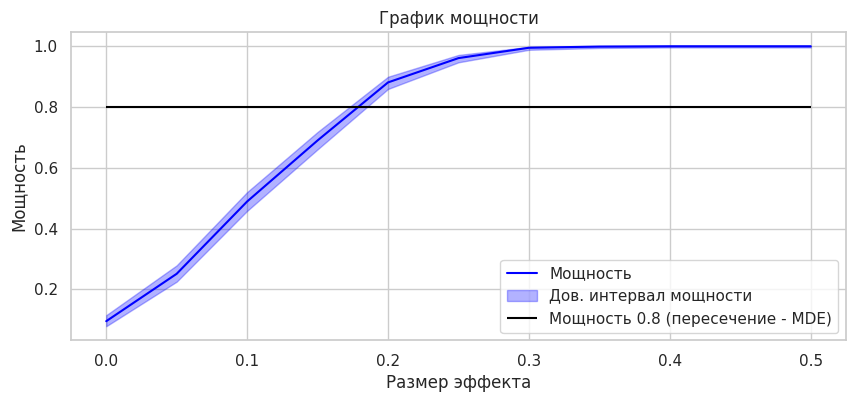

In [33]:
run_experiments(test=lambda x, y: bootstrap_ttest(x, y, bootstrap_info_rel, relative_ttest),
        generate_sample=lambda: generate_data_from_distrs(sps.gamma(a=3), 
                                                          sps.gamma(a=3), 
                                                          sample_size=1_000),
        effects=np.linspace(0, 0.5, 11),
        add_effect=add_effect,
        n_iter=1000,
        alpha=alpha,
);

Теперь поработаем с историческими данными

100%|██████████| 30000/30000 [00:17<00:00, 1757.65it/s]


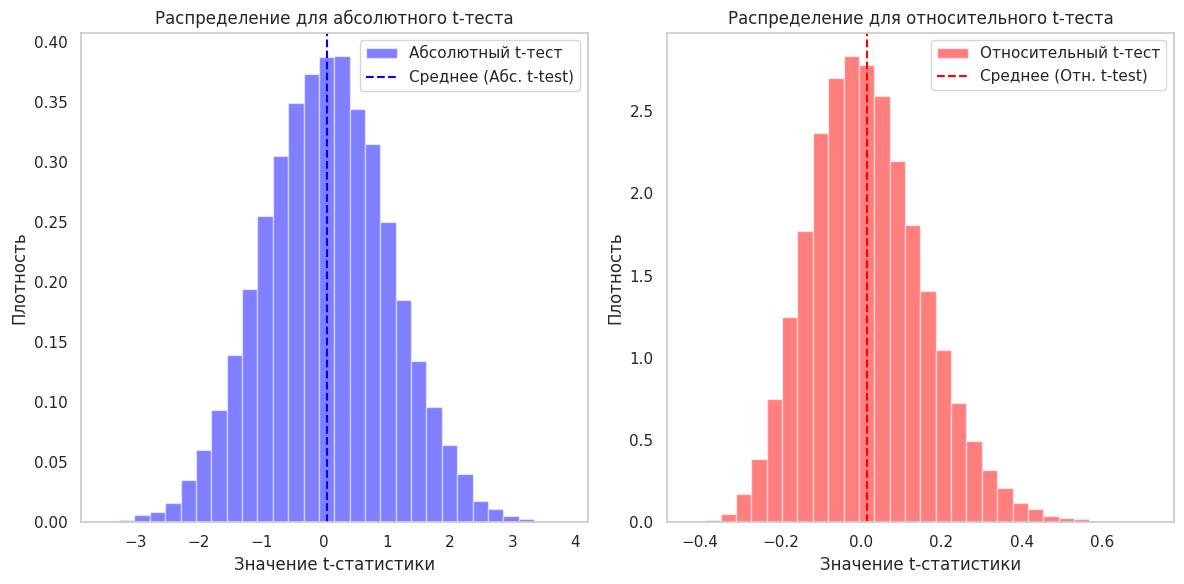

In [34]:
x, y = generate_sample_AA_test(may_april_df)

bootstrap_info_abs, original_stat_abs, original_pval_abs = get_bootstrap_stats(x, y, sps.ttest_ind, n_iter=30000)
bootstrap_info_rel, original_stat_rel, original_pval_rel = get_bootstrap_stats(x, y, relative_ttest, n_iter=30000)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(bootstrap_info_abs["stats"], bins=30, density=True, alpha=0.5, color="blue", label="Абсолютный t-тест")
plt.axvline(np.mean(bootstrap_info_abs["stats"]), color="blue", linestyle="--", label="Среднее (Абс. t-test)")
plt.title("Распределение для абсолютного t-теста")
plt.xlabel("Значение t-статистики")
plt.ylabel("Плотность")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(bootstrap_info_rel["stats"], bins=30, density=True, alpha=0.5, color="red", label="Относительный t-тест")
plt.axvline(np.mean(bootstrap_info_rel["stats"]), color="red", linestyle="--", label="Среднее (Отн. t-test)")
plt.title("Распределение для относительного t-теста")
plt.xlabel("Значение t-статистики")
plt.ylabel("Плотность")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Как видим, статистики распределены нормально.

Применим абсолютный t-test

100%|██████████| 10000/10000 [01:39<00:00, 100.57it/s]


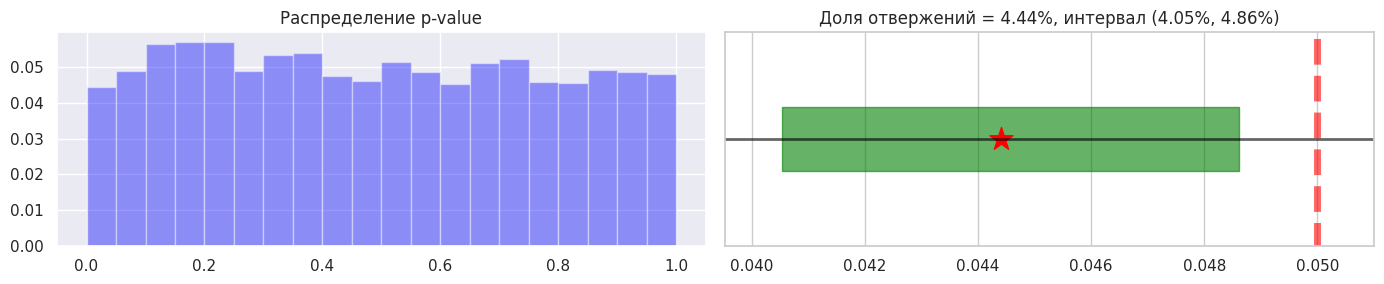

(np.float64(0.0444), (0.04053475956156519, 0.04861513975379532))

In [ ]:
print("Нет эффекта")
AA_test(
    test=lambda x, y: bootstrap_ttest(x, y, bootstrap_info_abs, sps.ttest_ind),
    generate_sample=generate_sample_AA_test,
    data=may_april_df,
    n_iter=n_iter,
    alpha=alpha,
    show_pvals=True
)

print("Эффект есть")
AA_test(
    test=lambda x, y: bootstrap_ttest(x, y, bootstrap_info_abs, sps.ttest_ind),
    generate_sample=generate_sample_AA_test,
    data=may_april_df,
    n_iter=n_iter,
    alpha=alpha,
    show_pvals=True,
)

Теперь посмотрим на относительный t-test

100%|██████████| 10000/10000 [01:15<00:00, 132.97it/s]


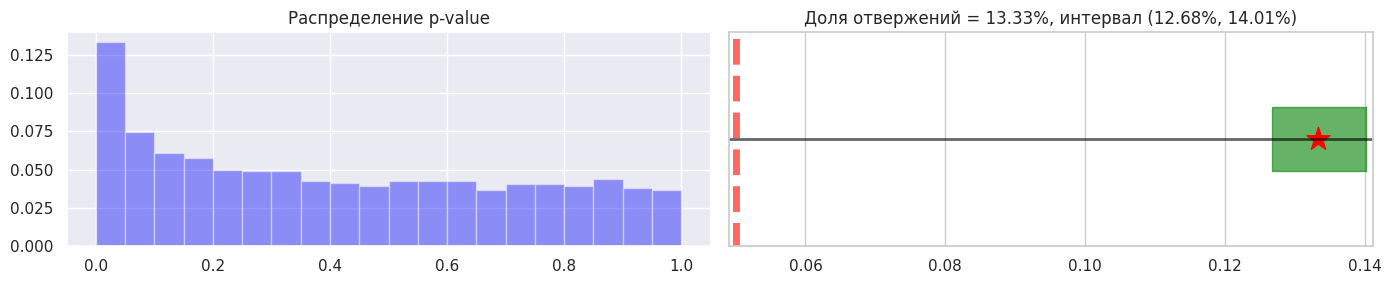

(np.float64(0.1333), (0.12677871147686712, 0.14010291292818708))

In [36]:
AA_test(
    test=lambda x, y: bootstrap_ttest(x, y, bootstrap_info_rel, relative_ttest),
    generate_sample=generate_sample_AA_test,
    data=may_april_df,
    n_iter=n_iter,
    alpha=alpha,
    show_pvals=True
)

Теперь снова посчитаем мощность для абсолютного t-testa

11it [01:47,  9.81s/it]


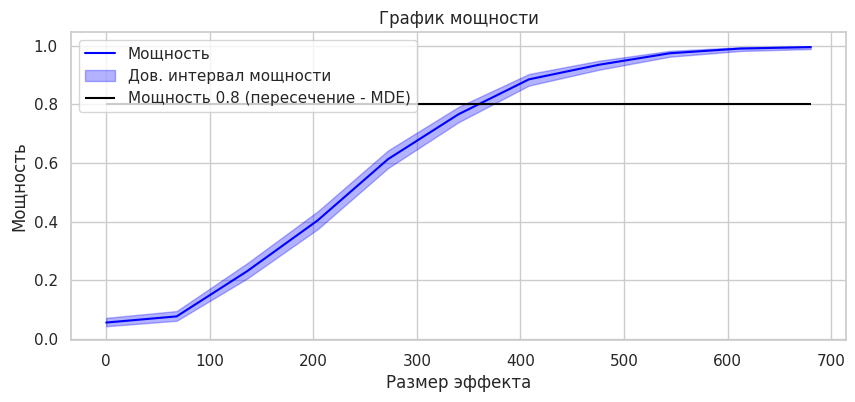

In [37]:
run_experiments(test=lambda x, y: bootstrap_ttest(x, y, bootstrap_info_abs, sps.ttest_ind), 
        generate_sample=generate_sample_AA_test,
        data=may_april_df,
        effects=np.linspace(0, MEAN_PRICE, 11),
        add_effect=add_effect,
        n_iter=1000,
        alpha=alpha,
);

А теперь для относительного t-testa

11it [01:29,  8.14s/it]


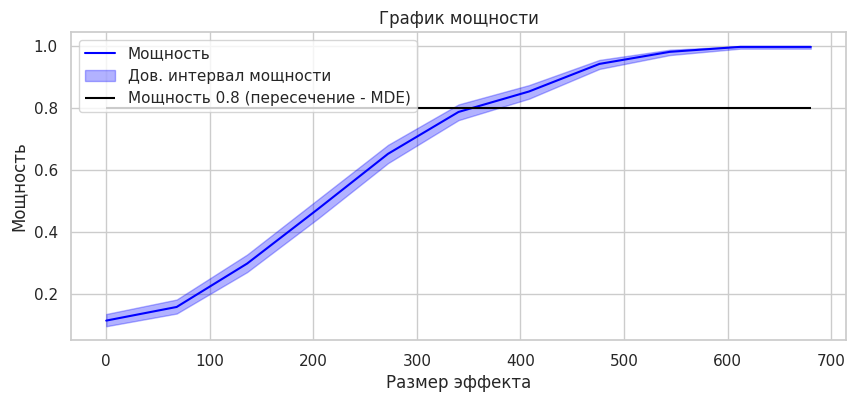

In [38]:
run_experiments(test=lambda x, y: bootstrap_ttest(x, y, bootstrap_info_rel, relative_ttest),
        generate_sample=generate_sample_AA_test,
        data=may_april_df,
        effects=np.linspace(0, MEAN_PRICE, 11),
        add_effect=add_effect,
        n_iter=1000,
        alpha=alpha,
);

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9c487359bc003d9d84dcc4c99c6a588d -->
Не забывайте про выводы.

**Выводы** Для искусственного примера результаты относительно похожи, на то, что было получено на семинаре, что говорит о корректности примененного метода. Заметим, что для гамма распределения ни относительный, ни абсолютный t-test при использованных размерах выборки не применим. Это может говорить о недостаточной мощнности критерия. Мощность сопоставима с тем, что было полученно на семинаре.

В случае же исторических данных, то тут, также как и в предыдущей задаче относительный критерий оказался не применим, т.к. $\alpha < \alpha_l$. Абсолютный критерий же напротив, оказался недостаточно мощным, но тем не мнее применимым. Мощность критерия в обоих случаях также имеет вид похожий на тот, что имели в пердыдущем номере.


В конце хочется отметить, что в ходе выполнения работы было подтвержден основной недостаток -- необходимость сэмплировать данные и рассчитывать статистики. Это занимает значительное время, но вместе с тем результаты получились не хуже, а случае с иускусственным примером даже лучше, чем до этого.